In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def get_distrib(distrib_type, delta=0.01):
    how_many_nums = int(1 / delta) + 1
    if distrib_type == "uniform":
        return np.ones(how_many_nums) / how_many_nums
    elif distrib_type == "normal":
        mean = 0.5
        std = 0.5/3.1
        x_vals = np.arange(how_many_nums) / (how_many_nums - 1)
        return stats.norm.pdf(x_vals, loc=mean, scale=std)

In [3]:
def binomial_likelihood_with_prior(n, p, k, prior):
    # p is array
    return np.array([stats.binom.pmf(k=k, n=n, p=pp)*prior_p for pp, prior_p in zip(p, prior)])

0.9999999999999997
0.009900000099000002
0.000803851297610505


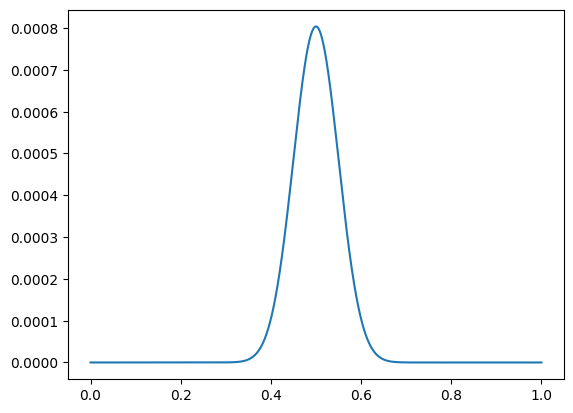

In [71]:
delta = 0.0001
distrib = get_distrib("uniform", delta=delta)  # prior probability distrib
print(distrib.sum())
n = 100  # 100 coin flips
k = 50  # 70 heads
ps = np.arange(len(distrib)) / (len(distrib) - 1)  # going over all possibilities of coin bias uniformly
blwp = binomial_likelihood_with_prior(n, ps, k, distrib)
p_data = blwp.sum()
print(p_data)
posterior = blwp / p_data
print(posterior.max())
plt.plot(ps, posterior)
plt.show()